**data science in the cloud with machine learning techniques**

---



# **0. Import libraries**

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Load data**

In [2]:
# load mnist dataset
mnist = tf.keras.datasets.mnist

In [3]:
# split the dataset to training and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# check the NaN values
np.isnan(x_train).any()

False

*There is no null value.*

---



In [5]:
# show one of features to be trained
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

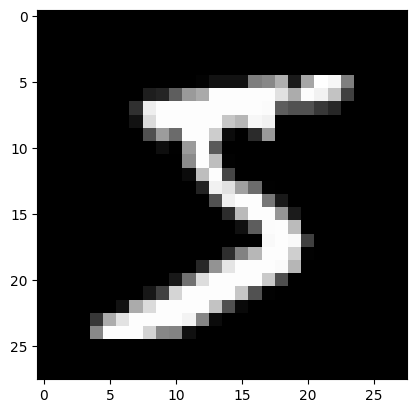

In [6]:
# show the actual image
plt.imshow(
    x_train[0],
    cmap='gray'
)
plt.show()

# **2. Normalization and reshaping**

In [7]:
# reshape the data
input_shape = (28, 28, 1)

x_train  = x_train.reshape(
    x_train.shape[0],
    x_train.shape[1],
    x_train.shape[2],
    1
)
x_train = x_train / 225.0

x_test  = x_test.reshape(
    x_test.shape[0],
    x_test.shape[1],
    x_test.shape[2],
    1
)
x_test = x_test / 225.0

# **3. Label encoding**

In [8]:
# transform the labels into one-hot encodings
y_train = tf.one_hot(
    y_train.astype(np.int32),
    depth=10
)
y_test = tf.one_hot(
    y_test.astype(np.int32),
    depth=10
)

In [9]:
# show the one-hot vector
print(y_train[10])

tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


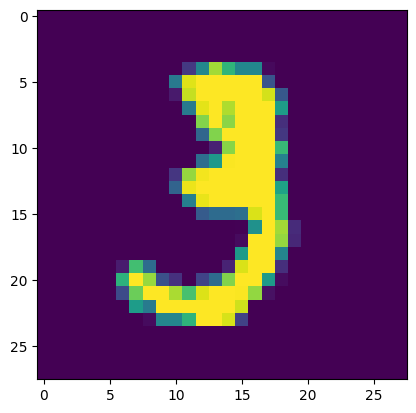

In [10]:
# show the actual image
plt.imshow(
    x_train[10][:,:,0]
)

# **4. Define the CNN model**

In [11]:
# define the values
batch_size = 64
num_classes = 10
epochs = 5

In [12]:
# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08),
              loss='categorical_crossentropy',
              metrics=['acc'])

# **5. Fit the training data**

In [13]:
# train the data
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/5
750/750 [==============================] - 21s 9ms/step - loss: 0.2337 - acc: 0.9269 - val_loss: 0.0462 - val_acc: 0.9878
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0804 - acc: 0.9763 - val_loss: 0.0372 - val_acc: 0.9887
Epoch 3/5
750/750 [==============================] - 6s 7ms/step - loss: 0.0581 - acc: 0.9829 - val_loss: 0.0402 - val_acc: 0.9874
Epoch 4/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0498 - acc: 0.9856 - val_loss: 0.0351 - val_acc: 0.9895
Epoch 5/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0460 - acc: 0.9865 - val_loss: 0.0386 - val_acc: 0.9902


# **6. Loss and accuracy curve**

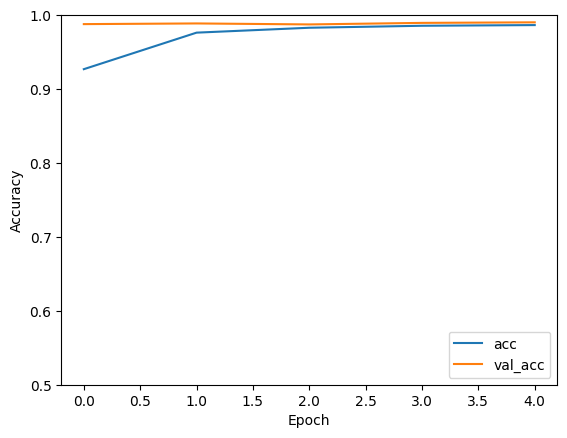

In [15]:
# plot the graph
plt.plot(
    history.history['acc'], label='acc'
)
plt.plot(
    history.history['val_acc'], label='val_acc'
)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [16]:
# evaluate
test_loss, test_acc = model.evaluate(
    x_test,
    y_test
)

313/313 [==============================] - 1s 5ms/step - loss: 0.0262 - acc: 0.9917


# **7. Predict results**

313/313 [==============================] - 1s 4ms/step


<Axes: >

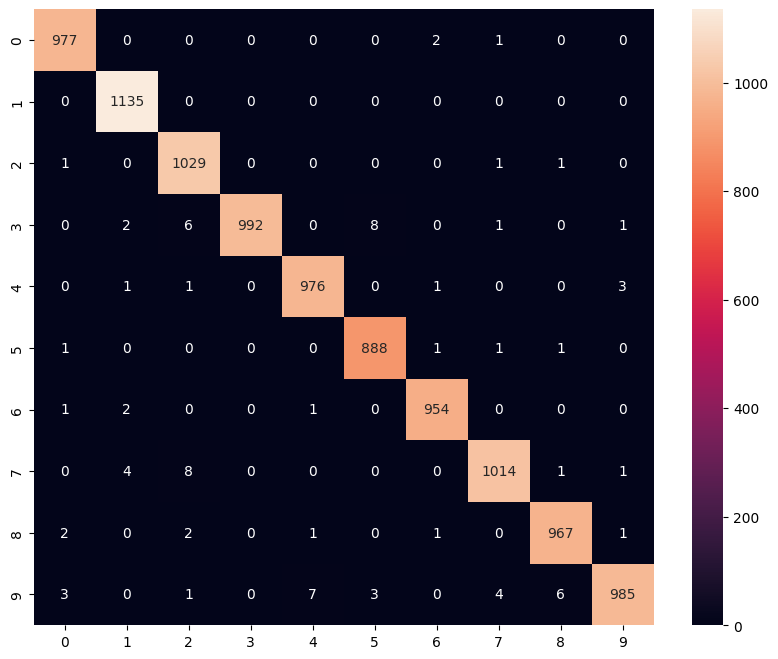

In [19]:
# predict
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')